# Log 0.8
1. Try 100 epochs, 
2. better but not good results, overtraining after 4 epochs
3. accuracy a(t) ~ 0.35, a(v) ~ 0.5 and loss l(t) ~ 1.6, l(v) ~ 1.6
4. Idea: try thicker layers, ei add more nodes


In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features.npy");
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels.npy");
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-0-7.h8')

Epoch 1/100
58/58 [==============================] - 4s 64ms/step - loss: 2.4550 - acc: 0.1733 - val_loss: 2.2494 - val_acc: 0.1533
Epoch 2/100
58/58 [==============================] - 3s 46ms/step - loss: 2.2687 - acc: 0.1750 - val_loss: 2.2099 - val_acc: 0.2174
Epoch 3/100
58/58 [==============================] - 3s 60ms/step - loss: 2.2075 - acc: 0.1845 - val_loss: 2.1697 - val_acc: 0.2098
Epoch 4/100
58/58 [==============================] - 3s 50ms/step - loss: 2.1558 - acc: 0.1802 - val_loss: 2.1344 - val_acc: 0.1804
Epoch 5/100
58/58 [==============================] - 4s 62ms/step - loss: 2.1051 - acc: 0.2310 - val_loss: 2.0902 - val_acc: 0.1750
Epoch 6/100
58/58 [==============================] - 4s 63ms/step - loss: 2.0796 - acc: 0.2052 - val_loss: 2.0596 - val_acc: 0.2587
Epoch 7/100
58/58 [==============================] - 3s 55ms/step - loss: 2.0422 - acc: 0.2155 - val_loss: 2.0355 - val_acc: 0.2554
Epoch 8/100
58/58 [==============================] - 4s 63ms/step - loss: 1.

58/58 [==============================] - 3s 50ms/step - loss: 1.1255 - acc: 0.5724 - val_loss: 1.5432 - val_acc: 0.4543
Epoch 63/100
58/58 [==============================] - 2s 42ms/step - loss: 1.1119 - acc: 0.5819 - val_loss: 1.4921 - val_acc: 0.4554
Epoch 64/100
58/58 [==============================] - 3s 57ms/step - loss: 1.1040 - acc: 0.5879 - val_loss: 1.5396 - val_acc: 0.4457
Epoch 65/100
58/58 [==============================] - 4s 64ms/step - loss: 1.0672 - acc: 0.5957 - val_loss: 1.5277 - val_acc: 0.4565
Epoch 66/100
58/58 [==============================] - 4s 61ms/step - loss: 1.0866 - acc: 0.5940 - val_loss: 1.5921 - val_acc: 0.4424
Epoch 67/100
58/58 [==============================] - 4s 62ms/step - loss: 1.0565 - acc: 0.5922 - val_loss: 1.5868 - val_acc: 0.4522
Epoch 68/100
58/58 [==============================] - 4s 61ms/step - loss: 1.0379 - acc: 0.6043 - val_loss: 1.6297 - val_acc: 0.4435
Epoch 69/100
58/58 [==============================] - 4s 63ms/step - loss: 1.0034 

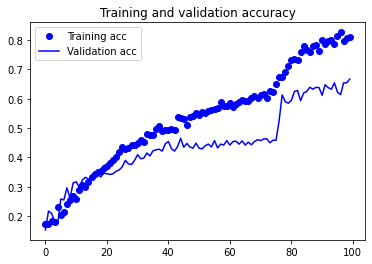

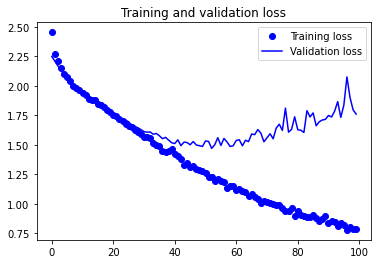

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()